Channels:
 - conda-forge
 - defaults
 - r
Platform: linux-64
Solving environment: / warning  libmamba Added empty dependency for problem type SOLVER_RULE_UPDATE
failed

LibMambaUnsatisfiableError: Encountered problems while solving:
  - package numpy-1.24.4-py310ha4c1d20_0 requires python >=3.10,<3.11.0a0, but none of the providers can be installed

Could not solve for environment specs
The following packages are incompatible
├─ numpy 1.24.4  is installable with the potential options
│  ├─ numpy 1.24.4 would require
│  │  └─ python >=3.10,<3.11.0a0 , which can be installed;
│  ├─ numpy 1.24.4 would require
│  │  └─ python >=3.11,<3.12.0a0 , which can be installed;
│  ├─ numpy 1.24.4 would require
│  │  └─ python >=3.8,<3.9.0a0 , which can be installed;
│  └─ numpy 1.24.4 would require
│     └─ python >=3.9,<3.10.0a0 , which can be installed;
└─ pin-1 is not installable because it requires
   └─ python 3.12.* , which conflicts with any installable versions previously reported.



In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score

In [3]:
st_flank = pd.read_csv("~/KinaseModulation/dv_cosmic_flank_st_threshold_90.csv")
y_flank = pd.read_csv("dv_cosmic_flank_y_threshold_90.csv")
st_to_y = pd.read_csv("dv_cosmic_st_to_y_threshold_90.csv")
y_to_st = pd.read_csv("dv_cosmic_y_to_st_threshold_90.csv")
phosm_or_null = pd.read_csv("dv_cosmic_phosm_null_threshold_90.csv")

In [4]:
X = st_flank

In [5]:
X.shape

(150581, 397)

In [6]:
X.head()

,Unnamed: 0,AAK1,ACVR2A,ACVR2B,AKT1,AKT2,AKT3,ALK2,ALK4,ALPHAK3,...,TRKC,TXK,TYK2,TYRO3,VEGFR1,VEGFR2,VEGFR3,WEE1_TYR,YES,ZAP70
0,E9PAV3_AVIPLSPKKA_1411_S_K1413Q,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Q6WKZ4_RQLSESSTKD_384_S_Q380K,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,O60315_LSSVLSEKGM_641_S_K643N,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Q9BXL6_EPWSFSSCLE_500_S_C502S,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Q8WZ42_FEKETTAVTE_1043_T_E1039D,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
# Set the first column as the index
X = X.set_index(X.columns[0])

# Remove the name of the index
X.index.name = None
X = X.drop(X.columns[(X==0).all()], axis=1)

In [8]:
X.head()

,AAK1,ACVR2A,ACVR2B,AKT1,AKT2,AKT3,ALK2,ALK4,ALPHAK3,AMPKA1,...,VRK1,VRK2,WNK1,WNK3,WNK4,YANK2,YANK3,YSK1,YSK4,ZAK
E9PAV3_AVIPLSPKKA_1411_S_K1413Q,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Q6WKZ4_RQLSESSTKD_384_S_Q380K,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
O60315_LSSVLSEKGM_641_S_K643N,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Q9BXL6_EPWSFSSCLE_500_S_C502S,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Q8WZ42_FEKETTAVTE_1043_T_E1039D,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
# Create a test set
#X = X[:1000]

In [10]:
X.shape

(150581, 303)

In [12]:
Z = linkage(X, method="ward")
print(Z.shape)

(999, 4)


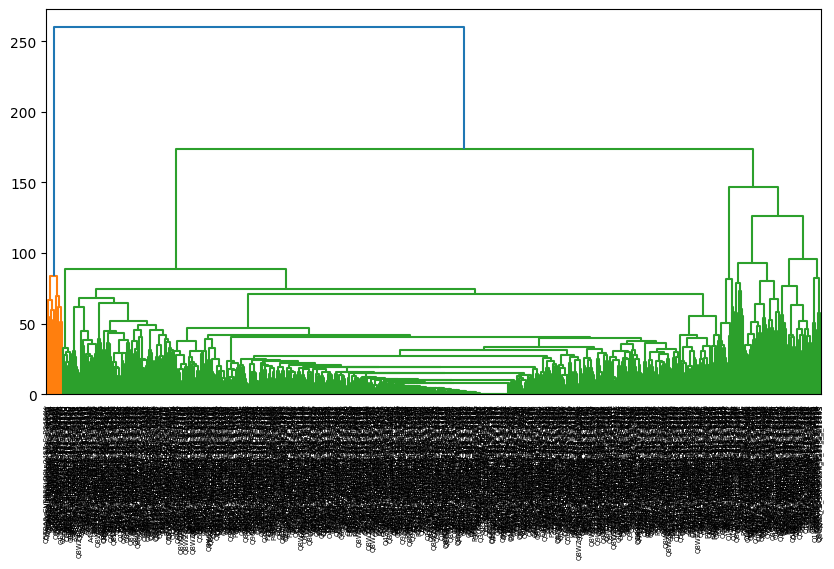

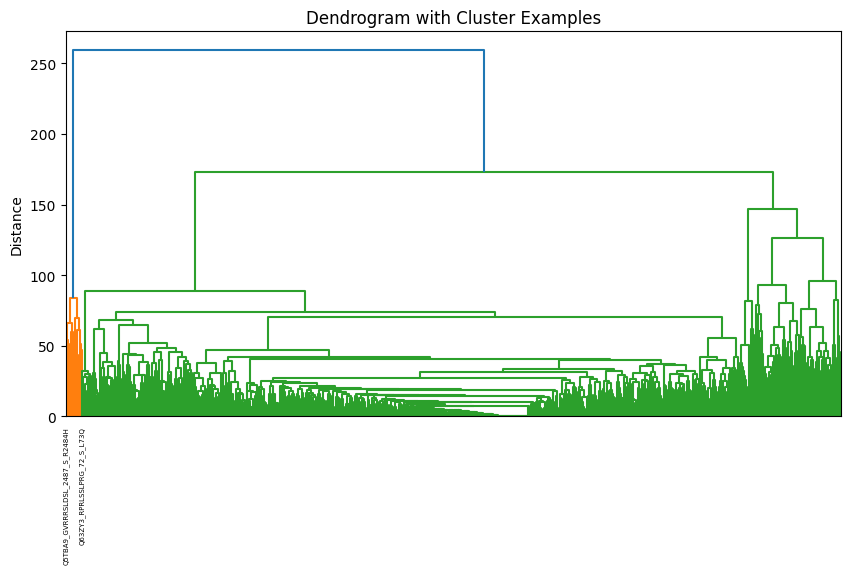

In [13]:
# Set color threshold to group clusters
color_threshold = 200 

# Create the dendrogram
plt.figure(figsize=(10, 5))
dendro = dendrogram(Z, color_threshold=color_threshold, labels=Xtest.index.tolist(), leaf_rotation=90)

# Get the leaf labels
leaf_labels = dendro['ivl']
leaf_colors = dendro['leaves_color_list']
leaf_positions = dendro['leaves']

# Create a dictionary to store the cluster examples
cluster_examples = {}
for idx, (color, pos) in enumerate(zip(leaf_colors, leaf_positions)):
    if color not in cluster_examples:
        cluster_examples[color] = []
    cluster_examples[color].append((pos, leaf_labels[idx]))

# Replace most labels with empty strings, keeping only 1 example per cluster with spacing
new_labels = [''] * len(leaf_labels)

for color, examples in cluster_examples.items():
    pos, label = examples[0]  # Select the first example from each cluster
    new_labels[pos] = label

# Plot the dendrogram with modified labels
plt.figure(figsize=(10, 5))
dendrogram(Z, color_threshold=color_threshold, labels=new_labels, leaf_rotation=90)
plt.title('Dendrogram with Cluster Examples')
plt.ylabel('Distance')
plt.show()

In [11]:
# Elbow Method
def elbow_method(data, max_clusters=10):
    inertia = []
    for n in range(1, max_clusters + 1):
        kmeans = KMeans(n_clusters=n, random_state=42)
        kmeans.fit(data)
        inertia.append(kmeans.inertia_)
    plt.figure(figsize=(8, 4))
    plt.plot(range(1, max_clusters + 1), inertia, marker='o')
    plt.title('Elbow Method')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Inertia')
    plt.show()

# Silhouette Analysis
def silhouette_analysis(data, max_clusters=10):
    silhouette_avg = []
    for n in range(2, max_clusters + 1):
        kmeans = KMeans(n_clusters=n, random_state=42)
        cluster_labels = kmeans.fit_predict(data)
        silhouette_avg.append(silhouette_score(data, cluster_labels))
    plt.figure(figsize=(8, 4))
    plt.plot(range(2, max_clusters + 1), silhouette_avg, marker='o')
    plt.title('Silhouette Analysis')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Average Silhouette Score')
    plt.show()

/home/eelias13/.local/site-packages/ood-jupyter-3.8/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/eelias13/.local/site-packages/ood-jupyter-3.8/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/eelias13/.local/site-packages/ood-jupyter-3.8/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/eelias13/.local/site-packages/ood-jupyter-3.8/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 1

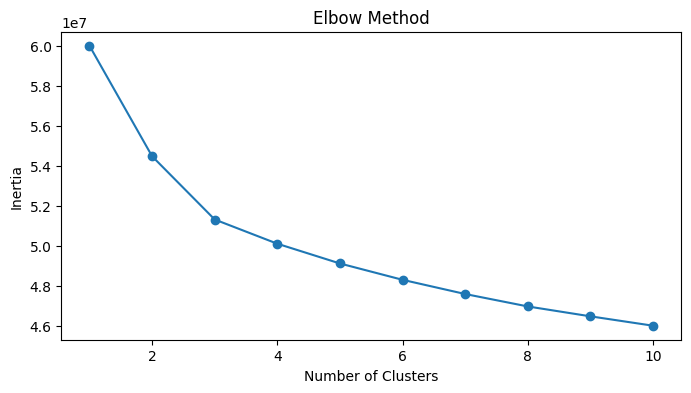

/home/eelias13/.local/site-packages/ood-jupyter-3.8/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/eelias13/.local/site-packages/ood-jupyter-3.8/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/eelias13/.local/site-packages/ood-jupyter-3.8/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/eelias13/.local/site-packages/ood-jupyter-3.8/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 1

In [ ]:
# Run both methods
# A good model is one with low inertia AND a low number of clusters
elbow_method(X)

silhouette_analysis(X)

In [16]:
# Choosing the optimal number of clusters
optimal_clusters = 4  # Set this based on the results from the plots
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
clusters = kmeans.fit_predict(Xtest)

# Display the resulting clusters
print(clusters)

# Count the number of elements in each cluster
unique_clusters, counts = np.unique(clusters, return_counts=True)

# Display the cluster counts
for cluster, count in zip(unique_clusters, counts):
    print(f"Cluster {cluster}: {count} elements")

pca_data['cluster'] = pd.Categorical(kmeans.labels_)
sns.scatterplot(x="PC1",y="PC2",hue="cluster",data=pca_data)

[0 0 0 0 0 2 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 2 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 2 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 2
 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 2 0 0 0 0 0
 0 0 0 0 0 1 3 0 2 0 0 0 0 0 3 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 3 0 0 0
 0 0 0 0 2 0 1 0 0 0 2 0 0 0 0 0 0 0 1 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0
 3 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 2 0
 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 3 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 3 2 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 1 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 

/home/eelias13/.local/site-packages/ood-jupyter-3.8/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
